In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt
import matplotlib as mpl

In [3]:
sns.set_theme()

In [4]:
import os
import json

In [18]:
results_root = '/home/kwatchar3/bss_spatial_eval/results/delay'

ddfs = os.listdir(results_root)
print(ddfs)


dfs = []

for d in ddfs:
    if 'results-ok.csv' in os.listdir(os.path.join(results_root, d)):
        df = pd.read_csv(os.path.join(results_root, d, 'results-ok.csv'))
    else:
        continue
    with open(os.path.join(results_root, d, 'args.json'), "r") as f:
        args = json.load(f)
    print(args.get('estim_filter_kwargs'))
    if args['estim_filter_kwargs']:
        df['rdelay'] = args['estim_filter_kwargs']['rdelay'] + 1
    else:
        df['rdelay'] = 1
    dfs.append(df)

df = pd.concat(dfs)
# df['est_deviation_j'] = df['est_deviation'].apply(lambda x: x + 1*np.random.randn()) 

# df = df[df['cutoff'] <= 4000]

palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

['20221130191118', '20221130190751', '20221130190943', '20221130191259', '20221130190347', '20221130190242', '20221130190451', '20221130190616', '20221130191533', '20221130191744', '20221130190133']
{'ldelay': 0, 'rdelay': 64, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 16, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 32, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 128, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 2, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 1, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 4, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 8, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 256, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 512, 'ftype': 'delay'}
None


In [19]:
df

,Unnamed: 0,spr/num,sfr/num,cost,true_angle,est_angle,est_deviation,file,rdelay
0,0,3.463214,8.439150,9.120525e+00,0.0,-45.0,-45.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,65
1,1,3.898432,5.651554,1.556971e+01,0.0,-30.0,-30.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,65
2,2,4.276580,3.329199,2.307995e+01,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,65
3,3,4.701377,1.089430,3.183093e+01,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,65
4,4,4.721161,-0.889478,4.006938e+01,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,65
...,...,...,...,...,...,...,...,...,...
443,443,17.667430,253.246799,3.940217e-24,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,1
444,444,310.243436,310.243436,0.000000e+00,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,1
445,445,17.667430,254.274337,3.110205e-24,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,1
446,446,11.665447,244.533999,2.929167e-23,0.0,30.0,30.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,1


In [20]:
def set_axes(fig, ax, line=100):
    fig.colorbar(
        plt.cm.ScalarMappable(norm=mpl.colors.LogNorm(df.rdelay.min(), df.rdelay.max()), cmap=palette), 
        ax=ax, label='cutoff frequency (Hz)', 
        pad=0.01, aspect=30, 
        ticks=[31.25, 62.5, 125, 250, 500, 1000, 2000, 4000],
        format=lambda v, t: f"{int(v//1000)}k" if v >= 1000 else str(v)
    )
    ax.legend_.remove()
    
    if line:
        ax.axhline(line, ls=':')

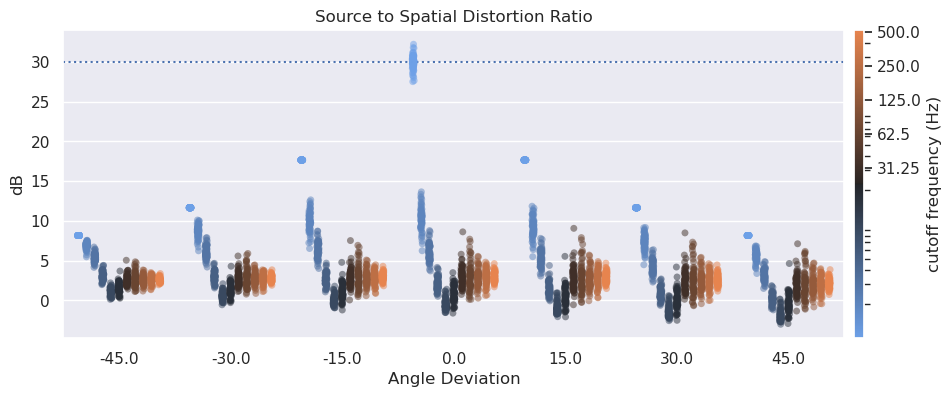

In [26]:
# dfj = df[~(df['est_deviation'] == 0.0)] #[~((df['est_deviation'] == 0.0) & (df['filt'].str.contains('no')))].copy()
fig, ax = plt.subplots(figsize=(12, 4))
 
line = 30 #np.percentile(df['spr/numx'].values, 0.99)
    
df['spr/numx'] = df['spr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)
    
ax = sns.stripplot(df,  y='spr/numx', x='est_deviation', hue='rdelay', ax=ax, alpha=0.5, dodge=True, palette=palette, hue_norm=mpl.colors.LogNorm(df.rdelay.min(), df.rdelay.max()))
ax.set(ylabel='dB', title='Source to Spatial Distortion Ratio', xlabel='Angle Deviation')

set_axes(fig, ax, line)
plt.show()

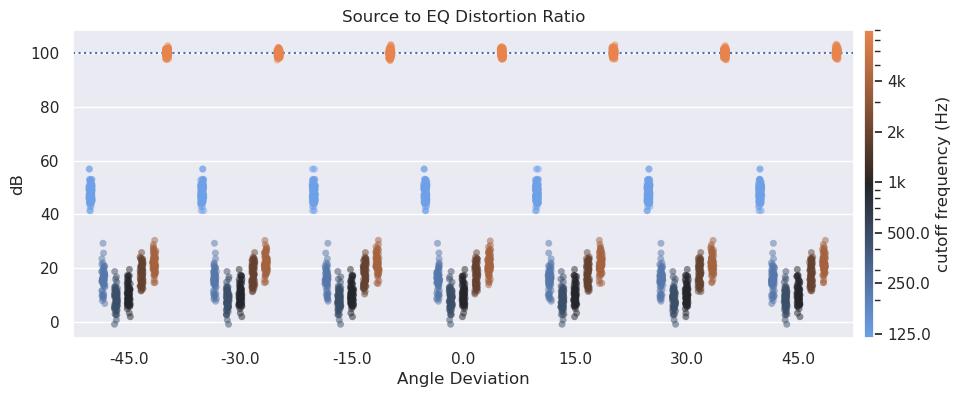

In [84]:
# ax = sns.scatterplot(df[~(df['filt'].str.contains('no'))], x='est_deviation_j', y='sfr/num', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))

line = 100

df['sfr/numx'] = df['sfr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)

ax = sns.stripplot(df,  y='sfr/numx', x='est_deviation', hue='cutoff', palette=palette, ax=ax, alpha=0.5, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='dB', title='Source to EQ Distortion Ratio', xlabel='Angle Deviation')
set_axes(fig, ax, line)
plt.show()

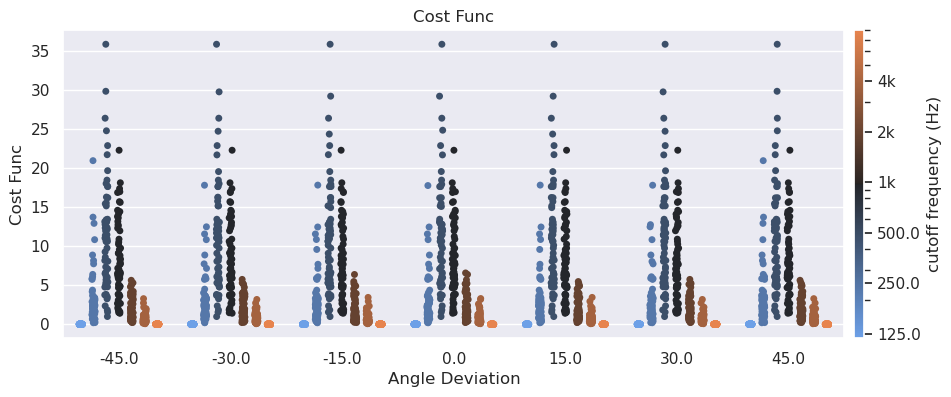

In [85]:
# ax = sns.scatterplot(df, x='est_deviation_j', y='cost', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.stripplot(df, x='est_deviation', y='cost', palette=palette, hue='cutoff', ax=ax, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='Cost Func', title='Cost Func', xlabel='Angle Deviation')
set_axes(fig, ax, line=False)
plt.show()